In [40]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [41]:
# Reading dataset
ds = pd.read_csv('Cleaned Dataset.csv')
ds

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000,Petrol
1,3,Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000,Petrol
2,4,EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000,Diesel
3,6,Figo,Ford,2012,175000.0,41000,Diesel
4,7,Eon,Hyundai,2013,190000.0,25000,Petrol
...,...,...,...,...,...,...,...
646,883,Suzuki Ritz VXI ABS,Maruti,2011,270000.0,50000,Petrol
647,885,Indica V2 DLE BS III,Tata,2009,110000.0,30000,Diesel
648,886,Corolla Altis,Toyota,2009,300000.0,132000,Petrol
649,888,Zest XM Diesel,Tata,2018,260000.0,27000,Diesel


In [42]:
# Removing Unnamed: 0 column
ds.drop(columns=['Unnamed: 0'],inplace = True)

In [43]:
ds

,name,company,year,Price,kms_driven,fuel_type
0,Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000,Petrol
1,Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000,Petrol
2,EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000,Diesel
3,Figo,Ford,2012,175000.0,41000,Diesel
4,Eon,Hyundai,2013,190000.0,25000,Petrol
...,...,...,...,...,...,...
646,Suzuki Ritz VXI ABS,Maruti,2011,270000.0,50000,Petrol
647,Indica V2 DLE BS III,Tata,2009,110000.0,30000,Diesel
648,Corolla Altis,Toyota,2009,300000.0,132000,Petrol
649,Zest XM Diesel,Tata,2018,260000.0,27000,Diesel


In [44]:
ds.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

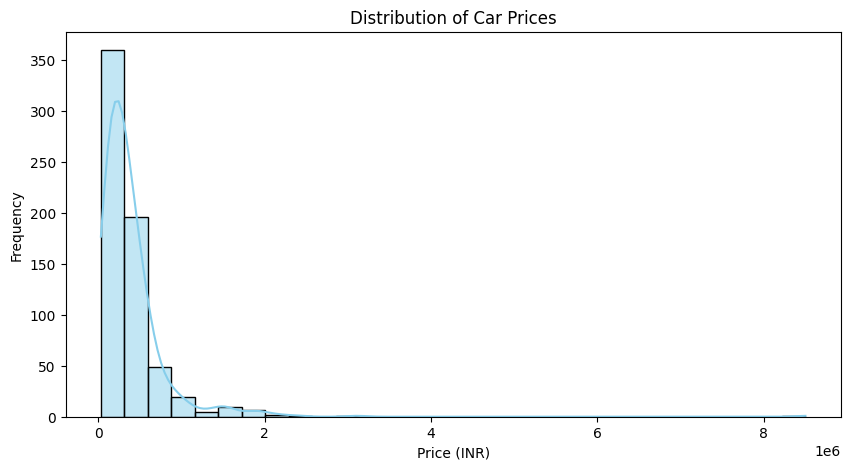

In [45]:
plt.figure(figsize = (10,5))
sns.histplot(ds['Price'], bins = 30,kde=True,color = 'skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

The GraphSHows how car prices are spread. A right skew indicates most cars are in the lower price range.

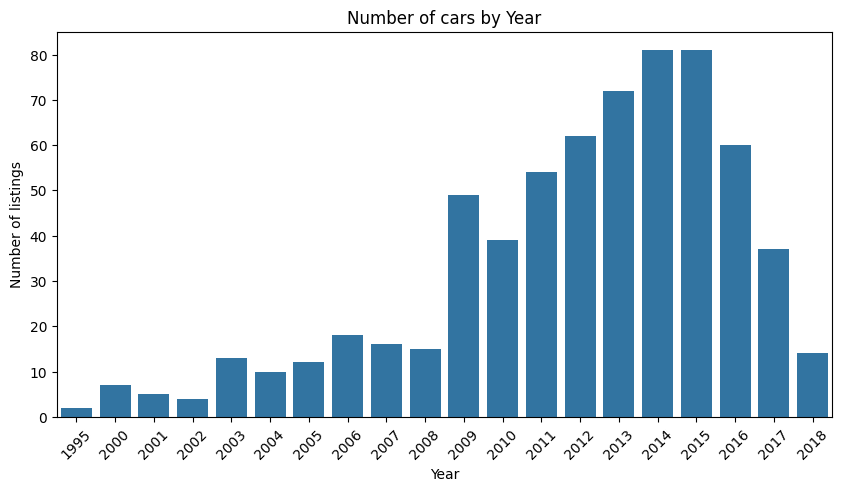

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(data = ds,x = 'year',order = sorted(ds['year'].unique()))
plt.xticks(rotation = 45)
plt.title("Number of cars by Year")
plt.xlabel("Year")
plt.ylabel("Number of listings")
plt.show()

Most listed cars are from recent years . Older cars are fewer due to wear or less demand

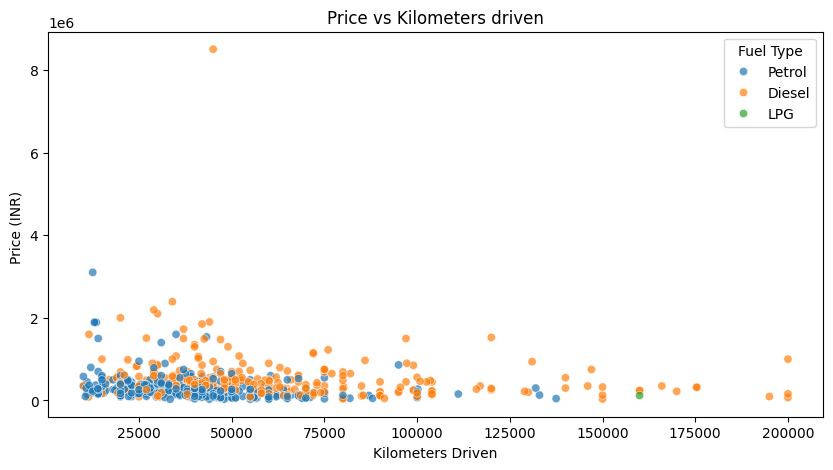

In [47]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = ds,x = 'kms_driven',y='Price',hue = 'fuel_type',alpha =0.7)
plt.title("Price vs Kilometers driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Price (INR) ")
plt.legend(title  = 'Fuel Type')
plt.show()

price generally drops as the kilometers increase. Fuel type may also influence price trends

In [48]:
ds['brand'] = ds['name'].str.split().str[0]
top_brands = ds['brand'].value_counts().head(10)
top_brands

brand
Suzuki     179
Scorpio     30
City        28
i20         19
Beat        18
Santro      18
Indigo      18
Eon         15
Duster      15
XUV500      14
Name: count, dtype: int64

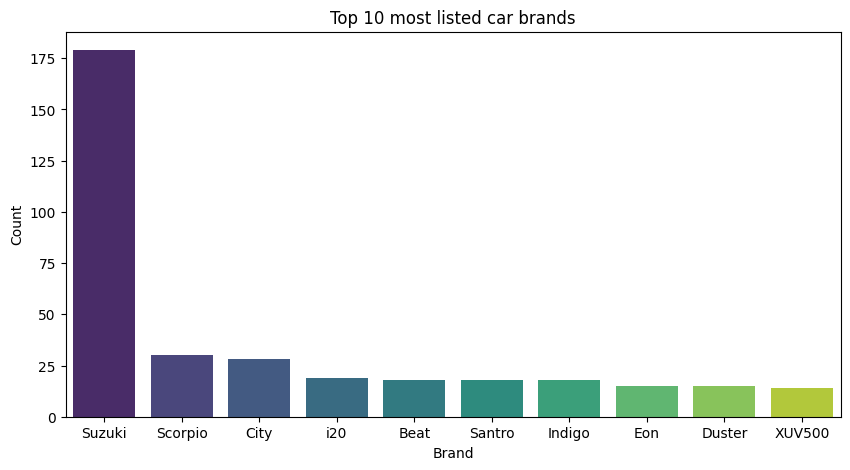

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(x = top_brands.index , y = top_brands.values , palette = 'viridis')
plt.title('Top 10 most listed car brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

These are the most common car brands sold on the platform .Helps understand market trends.Suzuki is the most demanding brand.

<Axes: xlabel='brand', ylabel='Price'>

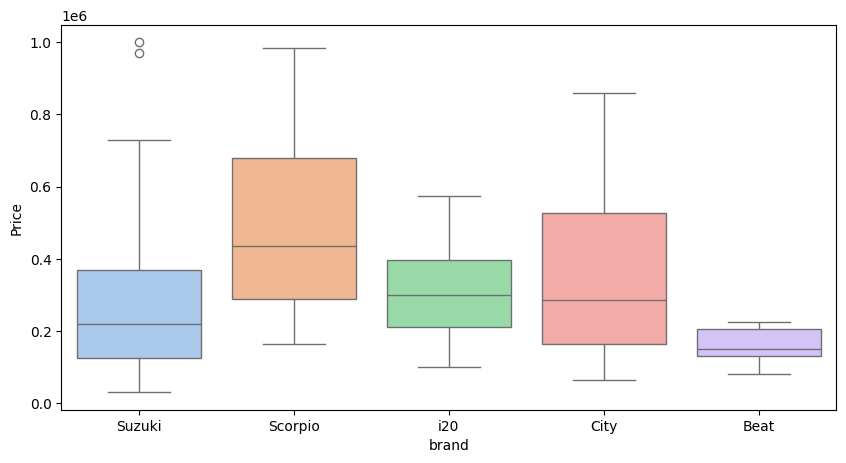

In [50]:
# Price comparison of top brands (BoxPlot)
top5 =ds['brand'].value_counts().head(5).index

plt.figure(figsize = (10,5))
sns.boxplot(data = ds[ds['brand'].isin(top5)],x='brand',y='Price',palette = 'pastel')

 This shows the price range and outliers per brand. Some brands have higher price variability.
Santro targets the lower-budget segment.
City and Scorpio Brand attract premium buyyers, these brands may have more models/variants.

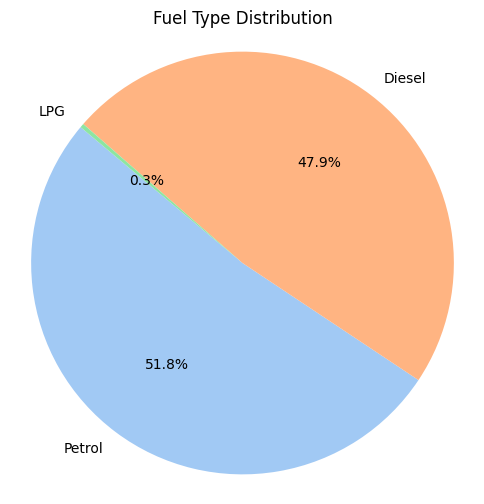

In [51]:
# Fuel Type Distribution
fuel_counts = ds['fuel_type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(fuel_counts,labels = fuel_counts.index,autopct = '%1.1f%%',startangle = 140,colors = sns.color_palette('pastel'))
plt.title('Fuel Type Distribution')
plt.axis('equal')
plt.show()

It reveals fuel types petrol is most common among listed cars.

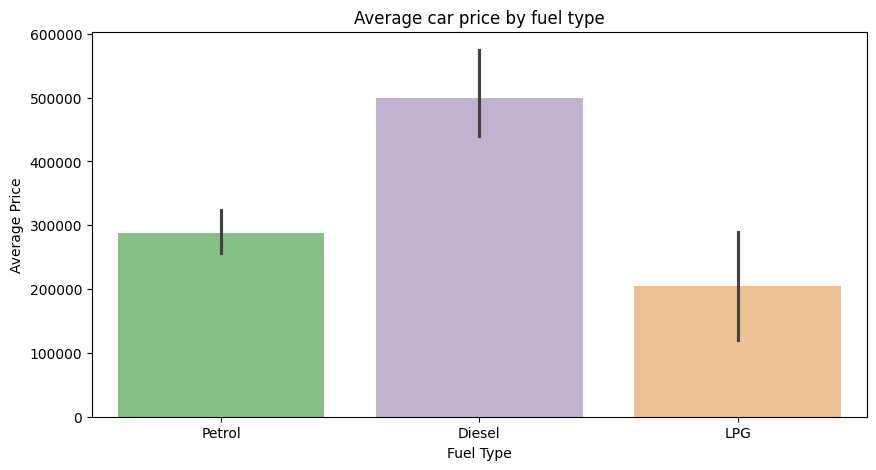

In [52]:
# Average Price by fuel type

plt.figure(figsize = (10,5))
sns.barplot(data = ds,x='fuel_type',y='Price',estimator = 'mean',palette = 'Accent')
plt.title("Average car price by fuel type")
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()

Reveals which fuel type tends to have higher avearge price.Diesel or hyrid cars may often be priced higher

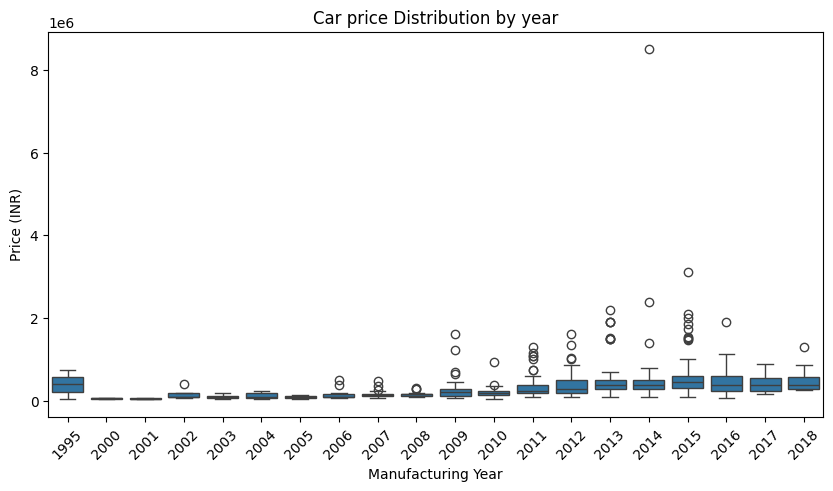

In [53]:
# Relationship between Year and Price
plt.figure(figsize=(10,5))
sns.boxplot(data = ds,x='year',y='Price')
plt.xticks(rotation =45)
plt.title("Car price Distribution by year")
plt.xlabel('Manufacturing Year')
plt.ylabel('Price (INR)')
plt.show()

Shows how price varies with car age . 
Usually , newer models have higher prices.

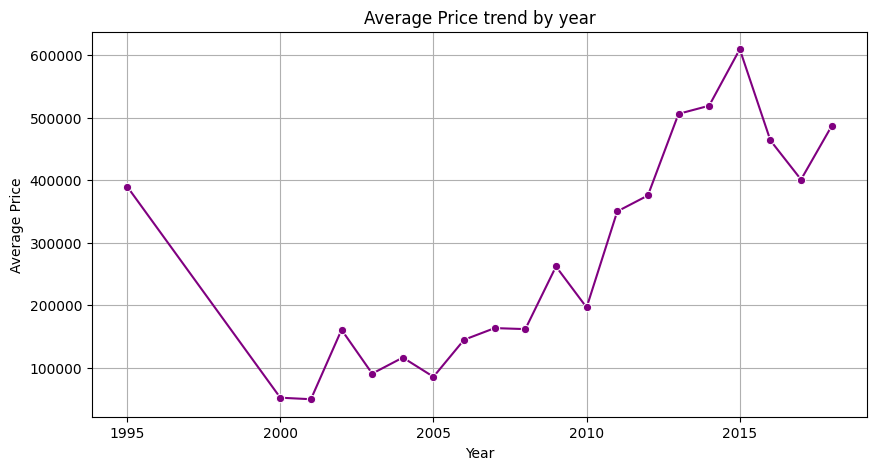

In [54]:
# Price Trend over years (Mean price per year)
avg_price_by_year = ds.groupby('year')['Price'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data = avg_price_by_year,x='year',y='Price',marker = 'o',color = 'purple')
plt.title('Average Price trend by year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

Helps Identify how car prices have changed over the years . Useful for trend analysis.

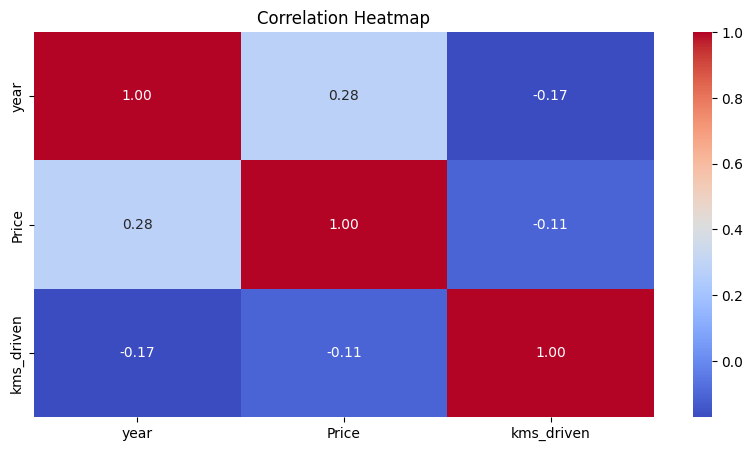

In [55]:
# Correlationship Heatmap
plt.figure(figsize=(10,5))
numeric_cols = ds.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix,annot = True,cmap = 'coolwarm',fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

Shows correlation between numeric variables like price, mileage, year, kms driven. Useful to identify predictive features.
As manufacturing increases, the price also increases.
The more a car is driven, the lower its resale value.